# Esame di Metodi Numerici del 7 Maggio 2025

## Ore 14

## Esercizio 1


 Nel file ````test_7_maggio_2025.mat```` sono memorizzati  le matrici di due sistemi lineari:
 
    A  x = b 

    A1 x1 = b1
 
 dove A, A1 sono le matrici dei coefficienti, b e b1 sono i termini noti, ed x ed x1 sono i vettori incogniti da determinare.

 - Verificare che per risolvere ciascuno dei due sistemi sia possibile utilizzare i due metodi di discesa (visti a lezione) ed il metodo di Gauss-Seidel, richiamando i risultati teorici opportuni.
 **Punti 1**
 - implementare i tre  algoritmi e  dire quante iterazioni richiede ciascuno di essi  per calcolare la soluzione con una toll=1e-6 e maxit=2000. Visualizzare in un grafico l'errore in scala logaritmica ad ogni iterazione per ciascuno dei due metodi. **Punti 7**
 - Analizzare l'indice di condizionamento delle due matrici e richiamare teoricamente cosa questo implica in termini della velocità di convergenza  dei tre metodi alla soluzione, richiamando i risultati teorici visti a lezione.**Punti 3**


**Punti totali 11**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('test_7_maggio_2025')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``


In [2]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

dati = loadmat('test_7_maggio_2025')
A=dati["A"]
A=A.astype(float)
b=dati["b"]
b=b.astype(float)
A1=dati["A1"]
A1=A1.astype(float)
b1=dati["b1"]
b1=b1.astype(float)

tests = [
    (A, b.reshape((b.shape[0], ))),
    (A1, b1.reshape((b1.shape[0], )))
]

# Entrambe sono matrici QUADRATE, grandi e sparse, per cui il primissimo prerequisito può essere considerato soddisfatto
print("A rows x cols", A.shape)
m, n = A.shape
print("Matrice A quadrata?", m == n)
print("A1 rows x cols", A1.shape)
m, n = A1.shape
print("Matrice A1 quadrata?", m == n)

# per poter applicare Gauss-Seidel, occorre che A e A1 siano a diagonale strettamente dominante
def is_strictly_diagonal_dominant(A):
    d = np.diag(np.abs(A))
    row_sum = np.sum(np.abs(A), axis=1) - d
    return np.all(d > row_sum)

print("A è a diagonale strettamente dominante?", is_strictly_diagonal_dominant(A))
print("A1 è a diagonale strettamente dominante?", is_strictly_diagonal_dominant(A1))

# Tecnicamente non si potrebbe applicare Gauss-Seidel! 
# Questo, da un punto di vista teorico, non garantisce la convergenza del metodo.

def gauss_seidel(A, b, x0, maxit, toll):
    r, c = A.shape
    if r != c:
        print("Matrice non quadrata!")
        return None, None
    
    d = np.diag(A)
    L = np.tril(A, -1)
    U = np.triu(A, 1)
    D = np.diag(A)
    
    # Nei metodi iterativi, in generale si cerca di scomporre A t.c. A = M - N
    # Sia Gauss-Seidel (compreso Gauss-Seidel SOR — generalizzazione di Gauss-Seidel) che Jacobi
    # prevedono che A = D + L + U
    # · D 'Diagonal' = matrice diagonale
    # · L 'Lower' = matrice triangolare inferiore
    # · U 'Upper' = matrice triangolare superiore
    
    # Per Gauss-Seidel,
    # M = U + D
    # N = -L
    M = U + D
    N = -L
    
    # Ax = b, A = M - N 
    # => (M - N)x = b 
    # => Mx - Nx = b
    # => Mx = Nx + b
    # => x = M^{-1}Nx + M^{-1}b
    # Possiamo associare a 
    # · T = M^{-1}N
    # · q = M^{-1}b
    T = np.linalg.inv(M) @ N
    q = np.linalg.inv(M) @ b
    
    # Ad ogni procedimento iterativo, otteniamo l'iterato successivo x_{k + 1}
    # calcolando:
    # x_{k + 1} = Tx_{k} + q
    x_next, x_curr = None, x0

    stop = False
    while not stop:
        x_next = T @ x_curr + q
        attempts.append(x_next)
        error = np.linalg.norm(x_next - x_curr) / np.linalg.norm(x_curr)
        if error < toll or len(attempts) > maxit: # criteri di arresto
            stop = True
        else: # procedi con l'iterazione
            x_curr = x_next
    
    return x_next, attempts

A rows x cols (500, 500)
Matrice A quadrata? True
A1 rows x cols (800, 800)
Matrice A1 quadrata? True
A è a diagonale strettamente dominante? False
A1 è a diagonale strettamente dominante? False


In [57]:
for A_k, b_k in tests:
    maxit = 1_000
    toll = np.spacing(1) # Tolleranza della macchina
    x0 = np.zeros(A.shape[0])
    gs_res = gauss_seidel(A_k, b_k, x0, maxit, toll)
    plt.plot(range(len(gs_res[1])), gs_res[1])
    plt.show()

# L'errore lanciato ci evidenzia che, per quel che riguarda la matrice iterazione 'T', questa non è invertibile!
# è quindi impossibile proseguire con il metodo di Gauss-Seidel

LinAlgError: Singular matrix

A simmetrica? True
A definita positiva? True
A1 simmetrica? True
A1 definita positiva? True
Steepest Descent output:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.

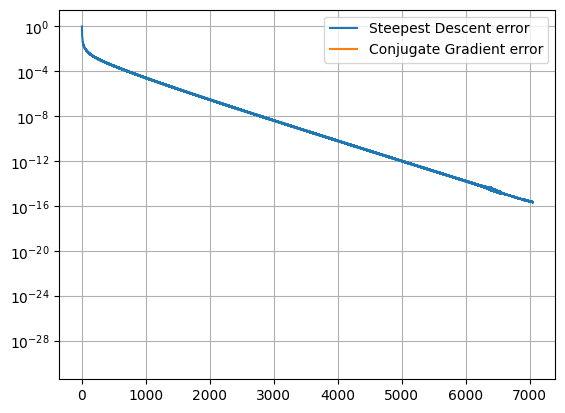

Steepest Descent output:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 

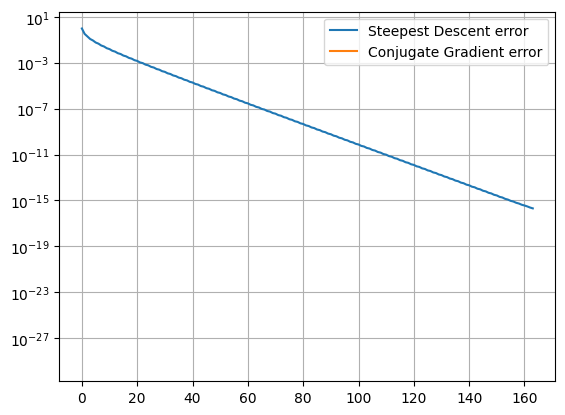

In [9]:
# Per poter applicare i metodi di discesa (Gradiente e Gradiente Coniugato)
# le matrici devono essere:
# 1) simmetriche
# 2) definite positive

def is_symm(A, toll=np.spacing(1)):
    return np.all(np.abs(A - A.T) < toll)

def is_def_pos(A):
    if not is_symm(A):
        return False
    return np.all(np.linalg.eigvals(A) > 0)

print("A simmetrica?", is_symm(A))
print("A definita positiva?", is_def_pos(A))

print("A1 simmetrica?", is_symm(A1))
print("A1 definita positiva?", is_def_pos(A1))

# Dal momento che entrambe le matrici sono simmetriche e definite positive, 
# allora posso applicare sia il metodo 'steepest descent' che quello del gradiente coniugato.

def steepest_descent(A, b, x0, toll, maxit):
    r, c = A.shape
    if r != c:
        print("Matrice non quadrata!")
        return None
    x_curr = x0
    stop = False
    errors = []
    
    while not stop:
        # (1) Vettore residuo
        r_k = A @ x_curr - b
        # (2) Direzione
        p = -r_k
        # (3) Step size
        step = (r_k @ r_k) / ((A @ r_k) @ r_k)
        x_curr += step * p
        error = np.linalg.norm(r_k) / np.linalg.norm(b)
        errors.append(error)
        if error < toll or len(errors) > maxit:
            stop = True
    return x_curr, errors

def conjugate_gradient(A, b, x0, toll, maxit):
    r, c = A.shape
    if r != c:
        print("Matrice non quadrata!")
        return None
    x_curr = x0
    r_next, r_curr = None, A @ x_curr - b
    p_next, p_curr = None, -r_curr
    errors = []
    stop = False

    while not stop:
        # calcolo la dimensione del passo da intraprendere
        step_size = (r_curr @ r_curr) / ((A @ p_curr) @ p_curr)
        
        # aggiorno l'iterato
        x_curr += step_size * p_curr

        # calcolo il nuovo vettore residuo
        r_next = A @ x_curr - b
        
        error = np.linalg.norm(r_next) ** 2
        errors.append(error)
        
        lambda_k = (r_curr @ r_curr) / (r_next @ r_next)
        p_next = -r_next + lambda_k * p_curr
        
        if error < toll or len(errors) > maxit:
            stop = True
        else:
            p_curr = p_next
            r_curr = r_next

    return x_curr, errors
    
for idx, (A_k, b_k) in enumerate(tests):
    maxit = 10_000
    toll = np.spacing(1) # Tolleranza della macchina
    x0 = np.zeros(A_k.shape[0])
    sd_res = steepest_descent(A_k, b_k.reshape((b_k.shape[0], )), x0, toll, maxit)
    cg_res = conjugate_gradient(A_k, b_k.reshape((b_k.shape[0], )), x0, toll, maxit)
    plt.grid(True)
    plt.semilogy(
        range(len(sd_res[1])), sd_res[1],
        range(len(cg_res[1])), cg_res[1]
    )
    plt.legend(["Steepest Descent error", "Conjugate Gradient error"])
    print("Steepest Descent output: ", sd_res[0])
    print("Conjugate Gradient output: ", cg_res[0])
    plt.show()

## Esercizio  2

**Siano assegnati i punti del piano di coordinate $(x_i, y_i)$, $i=1,\ldots,3$ con**
$$
\begin{array}{c}
x_1=1, \quad x_2=4, \quad x_3=0, \\
y_1=1, \quad y_2=0, \quad y_3=4 .
\end{array}
$$ 
Scrivere lo script Python  in cui
- si costruisce il sistema lineare  ottenuto imponendo il passaggio della circonferenza di equazione $x^2+y^2+a_1x+a_2y+a_3=0$ per i tre punti assegnati, e si denotino con ${\bf M}$ e ${\bf b}$ la matrice dei coefficienti e il termine noto ottenuti;   [**punti 3**]

- si calcola la soluzione del sistema lineare ${\bf M}{\bf a}={\bf b}$ usando il metodo di fattorizzazione adatto alle caratteristiche della matrice $M$[**punti 2**]

- dopo averne determinato centro e raggio (vedi sotto formula), si rappresentino in una stessa figura la circonferenza di equazione $x^2+y^2+a_1x+a_2y+a_3=0$ (dove i coefficienti $a_i$ rappresentano la soluzione del sistema lineare del punto precedente) e i tre punti assegnati dal problema.[**punti 1**]
- Abbiamo costruito la circonferenza  ................... i punti del piano
  [**punti 1**] 
  (completare al posto dei puntini)


**Siano assegnati i punti del piano di coordinate $(x_i, y_i)$, $i=1,\ldots,4$ con**
$$
\begin{array}{c}
x_1=1, \quad x_2=4, \quad x_3=0, \quad x_4=5 \\
y_1=1, \quad y_2=0, \quad y_3=4  \quad y_4=6.
\end{array}
$$ 
Scrivere lo script Python  in cui
- si costruisce il sistema lineare sovradeterminanto ottenuto imponendo il passaggio della circonferenza di equazione $x^2+y^2+a_1x+a_2y+a_3=0$ per i quattro punti assegnati, e si denotino con ${\bf A}$ e ${\bf c}$ la matrice dei coefficienti e il termine noto ottenuti;   [**punti 1**]

- si sfrutti la decomposizione QR  della matrice A  per ottenere la soluzione ${\bf a}^*$ del problema ai minimi quadrati $\min_{{\bf a} \in \mathbb{R}^3} \|{\bf A}{\bf a}-{\bf c}\|_2^2$  e  si calcoli il valore di $\|{\bf A}{\bf a}^*-{\bf c}\|_2^2$;   [**punti 5**]

-  dopo averne determinato centro e raggio, si rappresentino in una stessa figura la circonferenza di equazione $x^2+y^2+a^*_1x+a^*_2y+a^*_3=0$ (individuata dalla soluzione ${\bf a}^*$ del problema ai minimi quadrati) e i quattro punti assegnati dal problema.[**punti 1**]
-  
**Nota Bene**: Si ricorda che data una circonferenza nella forma canonica
$$ x^2+y^2+a_1 x+a_2 x+a_3=0$$

le coordinate del suo centro sono 
$$C≡(-a_1/2,-a_2/2)$$

e la lunghezza del suo raggio è data da:

$$r=\sqrt{\frac{a_1^2}{4}+\frac{a_2^2}{4} -a_3}$$

e la circoferenza può essere rappresentata in forma parametrica $C(t),  t \in [0, 2 \cdot \pi]$ e le due componenti parametriche sono $$x(t)= C_0+r\cdot cos(t);$$ $$ y(t)= C_1+r\cdot sin(t)$$


**Punti totali 14**

## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta:  +0.5 punti, ogni risposta errata: -0.5 punti. La mancanza di risposta:  0 punti**

**1** 
Quale delle seguenti affermazioni è FALSA riguardo alle reti MLP (Multilayer Perceptron)?

- Le reti MLP sono composte da uno o più strati nascosti di neuroni.
- Le reti MLP utilizzano una funzione di attivazione non lineare per introdurre una non linearità nel modello.

- Le reti MLP sono in grado di apprendere solo relazioni lineari tra i dati di input e output.

- Le reti MLP possono essere utilizzate per risolvere una vasta gamma di problemi di apprendimento automatico, tra cui la classificazione e la regressione.


**2.**  Quale delle seguenti affermazioni è la definizione CORRETTA di learning rate nel training di una rete neurale?

A) Il numero di volte in cui l'intero set di dati viene utilizzato durante il training.

B) Un parametro che controlla la velocità con cui i pesi della rete vengono aggiornati durante il training.

C) Il numero di neuroni presenti nello strato di output della rete.

D) La funzione di attivazione utilizzata dai neuroni della rete


3- Quale delle seguenti affermazioni è vera riguardo ai layer convoluzionali in una rete CNN?

(a) I layer convoluzionali applicano una funzione di attivazione a ciascun elemento della feature map in ingresso.

(b) I layer convoluzionali eseguono una convoluzione tra i filtri convoluzionali e la feature map in ingresso, producendo una nuova feature map.

(c) I layer convoluzionali riducono la dimensione spaziale della feature map in ingresso.

(d) I layer convoluzionali aumentano la dimensione spaziale della feature map in ingresso.

**4.**  
Quale tra le seguenti affermazioni descrive   il compito della funzione di attivazione nel training di una rete neurale?

- Trasformare i dati di input in un formato compatibile con la rete neurale

- Introdurre una non linearità nel flusso di informazioni della rete

- Calcolare l'errore tra l'output previsto e quello effettivo

- Aggiornare i pesi delle connessioni tra i neuroni softmax


**5.** Quale tra le seguenti affermazioni è FALSA riguardo alla suddivisione del dataset in un contesto di machine learning?

- La suddivisione del dataset in set di training, validation e test è fondamentale per valutare correttamente le prestazioni di un modello di machine learning.
- Il set di training viene utilizzato per addestrare il modello sui dati.
- Il set di validation viene utilizzato per trovare le etichette dei dati di input
- Il set di test viene utilizzato per valutare le prestazioni finali del modello su dati che non sono stati utilizzati per il training o la validation

# Domande aperte

**6. Descrivi in cosa consiste la fase di forward-propagation e back-propagation nell'ambito del training di una rete neurale, soffermandoti sull'importanza dell'algoritmo di backpropagation** per il calcolo delle derivate parziali della funzione costo rispetto ai pesi di tutti i layer **[punti 1.5]**

**7** Learning rate adattivo per ogni peso (durante il processo di ottimizzazione) : Adagrad, RMSProp, Adadelta, Adam. (formula di aggiornamento dei pesi e discussioni)
**[punti 3]**